In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [25]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Including odid 

In [2]:
# Change directory
osdir = '/Users/tsengtammy/Dropbox/bang_launch1'
os.chdir(osdir)

In [3]:
# Read in nice coded csv as a DataFrame
delay_df = pd.read_csv("data/gmaps_queries/coded/combined_live_coordinates.csv")

In [4]:
# Preview beginning of DataFrame
delay_df.head()

odid  dist_bg             dt_local  month  day  hour  min  dur_bg  \
0     0     4657  2017-02-21 00:20:00      2   21     0   20     821   
1     0     4657  2017-02-21 00:40:01      2   21     0   40     821   
2     0     4657  2017-02-21 01:00:00      2   21     1    0     821   
3     0     4657  2017-02-21 01:20:00      2   21     1   20     821   
4     0     4657  2017-02-21 01:40:00      2   21     1   40     821   

        date  sec  dow  hourfrac       hff  hff_clean       dt_local_clean  \
0  21feb2017    0    2  0.333333  0.333333   0.333333  2017-02-21 00:20:00   
1  21feb2017    1    2  0.666944  0.666667   0.666667  2017-02-21 00:40:00   
2  21feb2017    0    2  1.000000  1.000000   1.000000  2017-02-21 01:00:00   
3  21feb2017    0    2  1.333333  1.333333   1.333333  2017-02-21 01:20:00   
4  21feb2017    0    2  1.666667  1.666667   1.666667  2017-02-21 01:40:00   

      delay  orig_lat  orig_long  dest_lat  dest_long  
0  2.415718  12.91252   77.48537  12.90302   77.52204  
1  2.379930  12.91252   77.48537  12.90302   77.52204  
2  2.319090  12.91252   77.48537  12.90302   77.52204  
3  2.304774  12.91252   77.48537  12.90302   77.52204  
4  2.254670  12.91252   77.48537  12.90302   77.52204

In [5]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447988 entries, 0 to 447987
Data columns (total 20 columns):
odid              447988 non-null int64
dist_bg           447988 non-null int64
dt_local          447988 non-null object
month             447988 non-null int64
day               447988 non-null int64
hour              447988 non-null int64
min               447988 non-null int64
dur_bg            447988 non-null int64
date              447988 non-null object
sec               447988 non-null int64
dow               447988 non-null int64
hourfrac          447988 non-null float64
hff               447988 non-null float64
hff_clean         447988 non-null float64
dt_local_clean    447988 non-null object
delay             447988 non-null float64
orig_lat          447988 non-null float64
orig_long         447988 non-null float64
dest_lat          447988 non-null float64
dest_long         447988 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 68.4+ MB


In [6]:
# Drop the raw time information
delay_df.drop(['dt_local','hour','min','date','sec','hourfrac','hff'],axis=1,inplace=True)

In [7]:
# Create a new datetime index from the clean time information
delay_df['dt_local_clean'] = delay_df['dt_local_clean'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), 1)

In [8]:
# Generate day of week dummies
dow = pd.get_dummies(delay_df['dow'])
delay_df = pd.concat([delay_df, dow],axis=1)
delay_df.rename(columns={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday'}, inplace=True)

In [9]:
delay_df.head()

odid  dist_bg  month  day  dur_bg  dow  hff_clean      dt_local_clean  \
0     0     4657      2   21     821    2   0.333333 2017-02-21 00:20:00   
1     0     4657      2   21     821    2   0.666667 2017-02-21 00:40:00   
2     0     4657      2   21     821    2   1.000000 2017-02-21 01:00:00   
3     0     4657      2   21     821    2   1.333333 2017-02-21 01:20:00   
4     0     4657      2   21     821    2   1.666667 2017-02-21 01:40:00   

      delay  orig_lat  orig_long  dest_lat  dest_long  Monday  Tuesday  \
0  2.415718  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
1  2.379930  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
2  2.319090  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
3  2.304774  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
4  2.254670  12.91252   77.48537  12.90302   77.52204     0.0      1.0   

   Wednesday  Thursday  Friday  
0        0.0       0.0     0.0  
1        0.0       0.0     0.0  
2        0.0       0.0     0.0  
3        0.0       0.0     0.0  
4        0.0       0.0     0.0

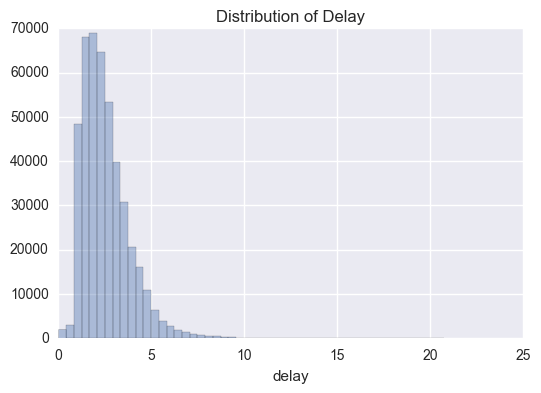

In [26]:
# Delay distribution
sns.distplot(delay_df['delay'], kde=False)
plt.title('Distribution of Delay')

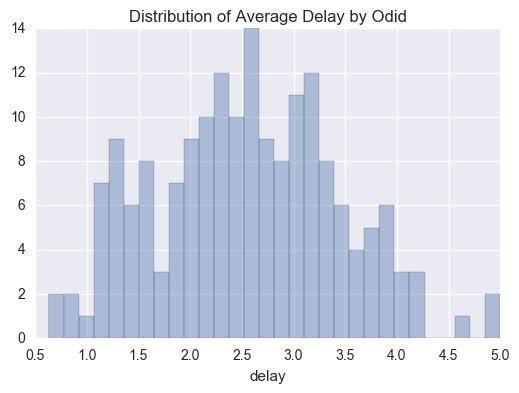

In [27]:
# Collapse by odid and plot distribution of average delay
sns.distplot(delay_df.groupby('odid').mean()['delay'], kde=False, bins=30)
plt.title('Distribution of Average Delay by Odid')

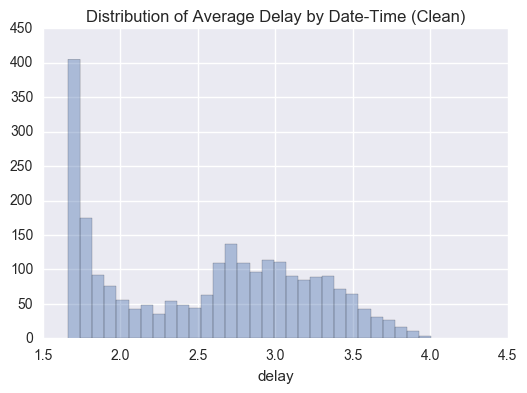

In [19]:
# Collapse by date and plot distribution of average delay
sns.distplot(delay_df.groupby('dt_local_clean').mean()['delay'], kde=False, bins=30)
plt.title('Distribution of Average Delay by Date-Time (Clean)')

In [28]:
odid = pd.get_dummies(delay_df['odid'],drop_first=True)

In [29]:
# Generate DataFrame with odid dummies
delay_df_dummies = pd.concat([delay_df, odid],axis=1)
delay_df_dummies.head()

odid  dist_bg  month  day  dur_bg  dow  hff_clean      dt_local_clean  \
0     0     4657      2   21     821    2   0.333333 2017-02-21 00:20:00   
1     0     4657      2   21     821    2   0.666667 2017-02-21 00:40:00   
2     0     4657      2   21     821    2   1.000000 2017-02-21 01:00:00   
3     0     4657      2   21     821    2   1.333333 2017-02-21 01:20:00   
4     0     4657      2   21     821    2   1.666667 2017-02-21 01:40:00   

      delay  orig_lat ...   168  169  170  171  172  173  174  175  176  177  
0  2.415718  12.91252 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  2.379930  12.91252 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  2.319090  12.91252 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  2.304774  12.91252 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  2.254670  12.91252 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 195 columns]

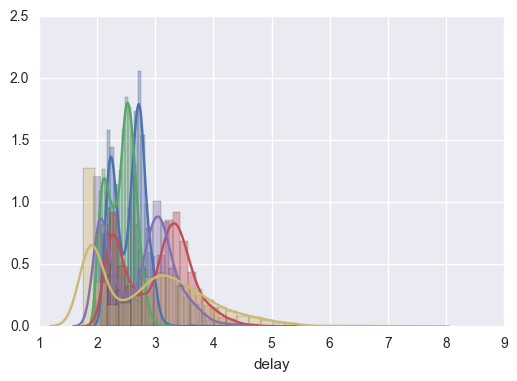

In [40]:
# Distribution plots of delay by odid (select)
sns.distplot(delay_df[delay_df['odid']==0]['delay'])
sns.distplot(delay_df[delay_df['odid']==1]['delay'])
sns.distplot(delay_df[delay_df['odid']==2]['delay'])
sns.distplot(delay_df[delay_df['odid']==3]['delay'])
sns.distplot(delay_df[delay_df['odid']==49]['delay'])

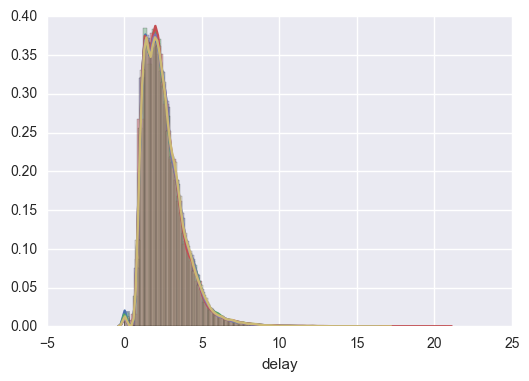

In [107]:
# Distribution plots of delay by day of week: not much difference
sns.distplot(delay_df[delay_df['Monday']==1['delay'])
sns.distplot(delay_df[delay_df['Tuesday']==1]['delay'])
sns.distplot(delay_df[delay_df['Wednesday']==1]['delay'])
sns.distplot(delay_df[delay_df['Thursday']==1]['delay'])
sns.distplot(delay_df[delay_df['Friday']==1]['delay'])

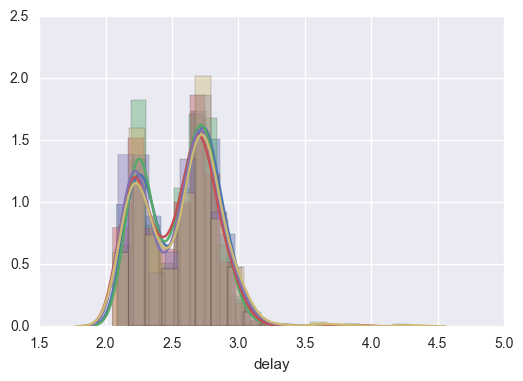

In [112]:
# Distribution plots of delay by day of week for odid 0: not much difference
sns.distplot(delay_df[(delay_df['Monday']==1) & (delay_df['odid']==0)]['delay'])
sns.distplot(delay_df[(delay_df['Tuesday']==1) & (delay_df['odid']==0)]['delay'])
sns.distplot(delay_df[(delay_df['Wednesday']==1) & (delay_df['odid']==0)]['delay'])
sns.distplot(delay_df[(delay_df['Thursday']==1) & (delay_df['odid']==0)]['delay'])
sns.distplot(delay_df[(delay_df['Friday']==1) & (delay_df['odid']==0)]['delay'])

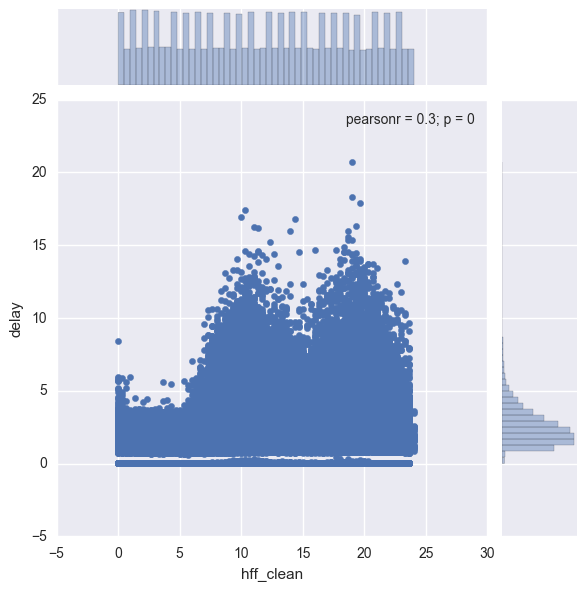

In [43]:
# Delay vs hff_clean
sns.jointplot(x='hff_clean', y='delay', data=delay_df)

In [30]:
# drop duplicates (keep first)
delay_df_D = delay_df.drop_duplicates(['odid', 'dt_local_clean'])

In [31]:
delay_df_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433223 entries, 0 to 447987
Data columns (total 18 columns):
odid              433223 non-null int64
dist_bg           433223 non-null int64
month             433223 non-null int64
day               433223 non-null int64
dur_bg            433223 non-null int64
dow               433223 non-null int64
hff_clean         433223 non-null float64
dt_local_clean    433223 non-null datetime64[ns]
delay             433223 non-null float64
orig_lat          433223 non-null float64
orig_long         433223 non-null float64
dest_lat          433223 non-null float64
dest_long         433223 non-null float64
Monday            433223 non-null float64
Tuesday           433223 non-null float64
Wednesday         433223 non-null float64
Thursday          433223 non-null float64
Friday            433223 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(6)
memory usage: 62.8 MB


In [32]:
delay_df_D.head()

odid  dist_bg  month  day  dur_bg  dow  hff_clean      dt_local_clean  \
0     0     4657      2   21     821    2   0.333333 2017-02-21 00:20:00   
1     0     4657      2   21     821    2   0.666667 2017-02-21 00:40:00   
2     0     4657      2   21     821    2   1.000000 2017-02-21 01:00:00   
3     0     4657      2   21     821    2   1.333333 2017-02-21 01:20:00   
4     0     4657      2   21     821    2   1.666667 2017-02-21 01:40:00   

      delay  orig_lat  orig_long  dest_lat  dest_long  Monday  Tuesday  \
0  2.415718  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
1  2.379930  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
2  2.319090  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
3  2.304774  12.91252   77.48537  12.90302   77.52204     0.0      1.0   
4  2.254670  12.91252   77.48537  12.90302   77.52204     0.0      1.0   

   Wednesday  Thursday  Friday  
0        0.0       0.0     0.0  
1        0.0       0.0     0.0  
2        0.0       0.0     0.0  
3        0.0       0.0     0.0  
4        0.0       0.0     0.0

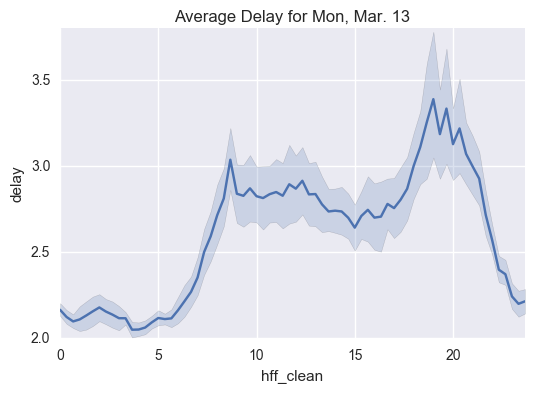

In [34]:
# plot delay for day Mar. 13 (Monday), error representation is collapsed over odid's
sns.tsplot(data=delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==13)] , time='hff_clean', unit='odid', value='delay')
plt.title('Average Delay for Mon, Mar. 13')

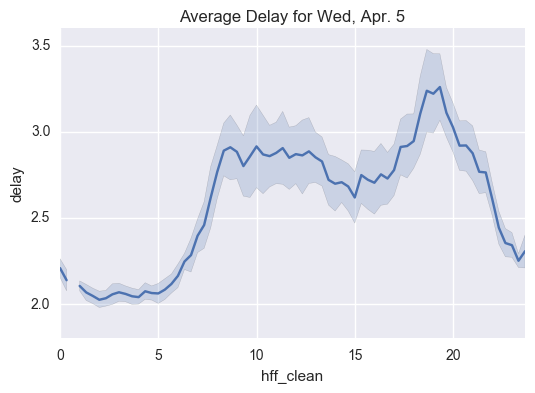

In [35]:
# plot delay for day Apr. 5 (Wednesday), error representation is collapsed over odid's
sns.tsplot(data=delay_df_D[(delay_df_D['month']==4) & (delay_df_D['day']==5)] , time='hff_clean', unit='odid', value='delay')
plt.title('Average Delay for Wed, Apr. 5')

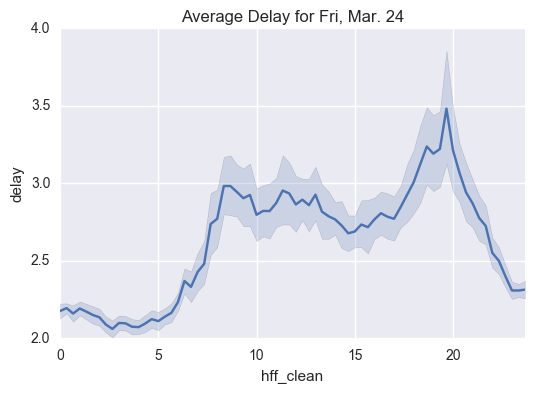

In [36]:
# plot delay for day Mar. 24 (Friday), error representation is collapsed over odid's
sns.tsplot(data=delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==24)] , time='hff_clean', unit='odid', value='delay')
plt.title('Average Delay for Fri, Mar. 24')

In [29]:
# plot delay, by odid : TAKES TOO LONG TO RUN
#sns.tsplot(data=delay_df_D, time='dt_local_clean', value='delay', condition='odid')

In [37]:
import plotly
import cufflinks as cf
cf.go_offline()

### Visualize time series (using data with duplicates dropped)

In [40]:
ts_fig = {
    'data': [
        {
            'x':delay_df_D[delay_df_D['odid']==odid]['dt_local_clean'],
            'y':delay_df_D[delay_df_D['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in [0, 50, 100]
    ],
    'layout': {
        'title': 'Delay for Select Odids',
        'yaxis': {'title': 'delay'}
    }
}

In [41]:
plotly.offline.iplot(ts_fig)

Take the week of Mar 13-Mar 17

In [44]:
week = delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']>=13) & (delay_df_D['day']<=17)]

In [45]:
week_fig = {
    'data': [
        {
            'x':week[week['odid']==odid]['dt_local_clean'],
            'y':week[week['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in [0, 50, 100]
    ],
    'layout': {
        'title': 'Delay for Select Odids: Week of Mar 13-Mar 17',
        'yaxis': {'title': 'delay'}
    }
}

In [46]:
plotly.offline.iplot(week_fig)

Now just take the day of Mar 13 (Monday)

In [47]:
mar13 = delay_df_D[(delay_df_D['month']==3) & (delay_df_D['day']==13)]

In [48]:
mar13_fig = {
    'data': [
        {
            'x':mar13[mar13['odid']==odid]['dt_local_clean'],
            'y':mar13[mar13['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in [0, 50, 100]
    ],
    'layout': {
        'title': 'Delay for Select Odids: Day of Monday, Mar 13',
        'yaxis': {'title': 'delay'}
    }
}

In [49]:
plotly.offline.iplot(mar13_fig)

In [53]:
mar13_fig_all = {
    'data': [
        {
            'x':mar13[mar13['odid']==odid]['dt_local_clean'],
            'y':mar13[mar13['odid']==odid]['delay'],
            'name': 'odid' + str(odid),
            'opacity':0.5
        } for odid in range(178)
    ],
    'layout': {
        'title': 'Delay for All Odids: Day of Monday, Mar 13',
        'yaxis': {'title': 'delay'}
    }
}

In [54]:
plotly.offline.iplot(mar13_fig_all)

## Split into train and test datasets

In [127]:
# FIGURE OUT HOW TO RANDOMLY DIVIDE BY ODID
from sklearn.model_selection import train_test_split

In [128]:
X = delay_df.drop(['odid','dow','delay'],axis=1)
y = delay_df['delay']
X_dummies = delay_df_dummies.drop(['odid','dow','delay'],axis=1)
y_dummies = delay_df_dummies['delay']

In [129]:
# split on odid level : this is the set without odid dummies
X_train = delay_df[delay_df['odid']<=124].drop(['odid','dow','delay'],axis=1)
X_test = delay_df[delay_df['odid']>124].drop(['odid','dow','delay'],axis=1)
y_train = delay_df[delay_df['odid']<=124]['delay']
y_test = delay_df[delay_df['odid']>124]['delay']

In [130]:
# split on odid level : this is the set with odid dummies
X_train_odid = delay_df_dummies[delay_df_dummies['odid']<=124].drop(['odid','dow','delay'],axis=1)
X_test_odid = delay_df_dummies[delay_df_dummies['odid']>124].drop(['odid','dow','delay'],axis=1)
y_train_odid = delay_df_dummies[delay_df_dummies['odid']<=124]['delay']
y_test_odid = delay_df_dummies[delay_df_dummies['odid']>124]['delay']

note: 

• adding odid dummies to baseline dataset improved performance (esp for MLP --> train!)

• adding dow dummies to baseline dataset worsened performance

• adding dow dummies to baseline + odid dummy dataset worsened performance

## Linear Regression: Lasso

In [154]:
from sklearn.linear_model import Lasso

Without odid dummies

In [175]:
lm = Lasso(alpha=.3) # better than .1. iterate through?

In [176]:
lm.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [177]:
# Adj R^2 of the prediction
lm.score(X_test, y_test)

0.48638471918226533

In [178]:
print(lm.intercept_)
lm_coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
lm_coeff

2.12187118703


Coefficient
dist_bg      -0.000833
month         0.000000
day          -0.004006
dur_bg        0.005212
hff_clean     0.055517
orig_lat      0.000000
orig_long     0.000000
dest_lat      0.000000
dest_long     0.000000
Monday       -0.000000
Tuesday       0.000000
Wednesday    -0.000000
Thursday     -0.000000
Friday        0.000000

With odid dummies

In [179]:
lm_odid = Lasso(alpha=.3)

In [180]:
lm_odid.fit(X_train_odid, y_train_odid)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [181]:
lm_odid.score(X_test_odid, y_test_odid)

0.48638471918226533

In [182]:
print(lm_odid.intercept_)
lm_odid_coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
lm_odid_coeff.head(14)

2.12187118703


Coefficient
dist_bg      -0.000833
month         0.000000
day          -0.004006
dur_bg        0.005212
hff_clean     0.055517
orig_lat      0.000000
orig_long     0.000000
dest_lat      0.000000
dest_long     0.000000
Monday       -0.000000
Tuesday       0.000000
Wednesday    -0.000000
Thursday     -0.000000
Friday        0.000000

## Linear regression: Ridge

In [166]:
from sklearn.linear_model import Ridge

Without odid dummies

In [189]:
lr = Ridge(alpha=.1)

In [190]:
lr.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [191]:
# Adj R^2 of prediction
lr.score(X_test, y_test)

0.41841083321554484

In [193]:
print(lr.intercept_)
lr_coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
lr_coeff

-170.652972983


Coefficient
dist_bg      -0.000828
month         0.028723
day          -0.006693
dur_bg        0.005239
hff_clean     0.061783
orig_lat      1.023146
orig_long     1.113980
dest_lat      0.528296
dest_long     0.852150
Monday       -0.008374
Tuesday       0.028990
Wednesday    -0.026932
Thursday     -0.013564
Friday        0.019879

With odid dummies

In [194]:
lr_odid = Ridge(alpha=.1)

In [195]:
lr_odid.fit(X_train_odid, y_train_odid)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [196]:
# Adj R^2 of prediction
lr_odid.score(X_test_odid, y_test_odid)

0.46107755676873402

In [198]:
print(lr_odid.intercept_)
lr_odid_coeff = pd.DataFrame(lr_odid.coef_, X_dummies.columns, columns=['Coefficient'])
lr_odid_coeff.head(14)

-216.280155663


Coefficient
dist_bg      -0.000800
month         0.030200
day          -0.006652
dur_bg        0.004762
hff_clean     0.061845
orig_lat      0.561362
orig_long     1.614258
dest_lat      0.717289
dest_long     0.985074
Monday       -0.008439
Tuesday       0.028900
Wednesday    -0.026919
Thursday     -0.013611
Friday        0.020069

## Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor

Without odid dummies

In [142]:
forest = RandomForestRegressor()

In [143]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [144]:
# Adj R^2 of the prediction
forest.score(X_test, y_test)

0.32600029858965052

In [145]:
# Feature importance array
forest_feat = pd.DataFrame(forest.feature_importances_, index=X.columns, columns=["importance"]).sort_values('importance', ascending=False)
forest_feat

importance
hff_clean    0.345711
dur_bg       0.235116
dist_bg      0.224956
day          0.052289
orig_lat     0.028673
dest_long    0.026505
dest_lat     0.026019
orig_long    0.016505
month        0.012389
Friday       0.008414
Wednesday    0.007170
Thursday     0.005492
Tuesday      0.005444
Monday       0.005317

With odid dummies

In [146]:
forest_odid = RandomForestRegressor()

In [147]:
forest_odid.fit(X_train_odid, y_train_odid)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [148]:
forest_odid.score(X_test_odid, y_test_odid)

0.33529869281541047

In [153]:
forest_odid_feat = pd.DataFrame(forest_odid.feature_importances_, index=X_train_odid.columns, columns=["importance"]).sort_values('importance', ascending=False)
forest_odid_feat.head(14)

importance
hff_clean    0.343354
dur_bg       0.228102
dist_bg      0.220175
day          0.052289
dest_lat     0.033182
orig_lat     0.022308
94           0.014185
month        0.012803
dest_long    0.011704
orig_long    0.010503
Friday       0.008617
Wednesday    0.007808
Thursday     0.005757
Monday       0.005318

## Neural Net: Multilayer Perceptron (SKlearn)

Without odid dummies

In [40]:
# NEED TO TRAIN THIS NEURAL NET: iterate through parameters for batch size, alpha
from sklearn.neural_network import MLPRegressor

In [41]:
mlp = MLPRegressor()

In [42]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [43]:
# Adj R^2 of the prediction
mlp.score(X_test, y_test)

0.13675087367443994

With odid dummies

In [45]:
mlp_odid = MLPRegressor()

In [46]:
mlp_odid.fit(X_train_odid, y_train_odid)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [47]:
mlp_odid.score(X_test_odid, y_test_odid)

0.52511913930126064